In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile
import cv2
import plotly.express as px


from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans

%matplotlib inline

In [2]:
df = pd.read_csv('sales_data_sample.csv', encoding = 'unicode_escape', parse_dates=['ORDERDATE'])
df.head()

ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

   ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0 2003-02-24  Shipped       1         2     2003  ...   
1 2003-05-07  Shipped       2         5     2003  ...   
2 2003-07-01  Shipped       3         7     2003  ...   
3 2003-08-25  Shipped       3         8     2003  ...   
4 2003-10-10  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1             59 rue de l'Abbaye           NaN          Reims   NaN   
2  27 rue du Colonel Pierre Avia           NaN          Paris   NaN   
3             78934 Hillside Dr.           NaN       Pasadena    CA   
4                7734 Strong St.           NaN  San Francisco    CA   

  POSTALCODE COUNTRY TERRITORY CONTACTLASTNAME CONTACTFIRSTNAME DEALSIZE  
0      10022     USA       NaN              Yu             Kwai    Small  
1      51100  France      EMEA         Henriot             Paul    Small  
2      75508  France      EMEA        Da Cunha           Daniel   Medium  
3      90003     USA       NaN           Young            Julie   Medium  
4        NaN     USA       NaN           Brown            Julie   Medium  

[5 rows x 25 columns]

In [40]:
df.isnull().sum()

QUANTITYORDERED     0
PRICEEACH           0
ORDERLINENUMBER     0
SALES               0
MONTH_ID            0
YEAR_ID             0
MSRP                0
PRODUCTCODE         0
Australia           0
Austria             0
Belgium             0
Canada              0
Denmark             0
Finland             0
France              0
Germany             0
Ireland             0
Italy               0
Japan               0
Norway              0
Philippines         0
Singapore           0
Spain               0
Sweden              0
Switzerland         0
UK                  0
USA                 0
Classic Cars        0
Motorcycles         0
Planes              0
Ships               0
Trains              0
Trucks and Buses    0
Vintage Cars        0
Large               0
Medium              0
Small               0
dtype: int64

In [6]:
df_drop  = ['ADDRESSLINE1', 'ADDRESSLINE2', 'POSTALCODE', 'CITY', 'TERRITORY', 'PHONE', 'STATE', 'CONTACTFIRSTNAME', 'CONTACTLASTNAME', 'CUSTOMERNAME', 'ORDERNUMBER']
df = df.drop(df_drop, axis=1)
df.head(3)

QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  ORDERDATE   STATUS  \
0               30      95.70                2  2871.00 2003-02-24  Shipped   
1               34      81.35                5  2765.90 2003-05-07  Shipped   
2               41      94.74                2  3884.34 2003-07-01  Shipped   

   QTR_ID  MONTH_ID  YEAR_ID  PRODUCTLINE  MSRP PRODUCTCODE COUNTRY DEALSIZE  
0       1         2     2003  Motorcycles    95    S10_1678     USA    Small  
1       2         5     2003  Motorcycles    95    S10_1678  France    Small  
2       3         7     2003  Motorcycles    95    S10_1678  France   Medium

#### Drop georaphic features and names, phone

In [7]:
df.shape

(2823, 14)

In [8]:
df.isna().sum()

QUANTITYORDERED    0
PRICEEACH          0
ORDERLINENUMBER    0
SALES              0
ORDERDATE          0
STATUS             0
QTR_ID             0
MONTH_ID           0
YEAR_ID            0
PRODUCTLINE        0
MSRP               0
PRODUCTCODE        0
COUNTRY            0
DEALSIZE           0
dtype: int64

In [9]:
def barplot_visualization(x):
  fig = plt.Figure(figsize = (12, 6))
  fig = px.bar(x = df[x].value_counts().index, y = df[x].value_counts(), color = df[x].value_counts().index, height = 600)
  fig.show();

In [10]:
barplot_visualization('COUNTRY')

In [11]:
barplot_visualization('STATUS');

#### Drop unbalanced feature

In [12]:
df.drop(columns=['STATUS'], axis=1, inplace=True)

In [13]:
print('Columns resume: ', df.shape[1])

Columns resume:  13


In [14]:
barplot_visualization('PRODUCTLINE')

In [15]:
barplot_visualization('DEALSIZE')

### Prepare data

In [16]:
def dummies(x):
  dummy = pd.get_dummies(df[x])
  df.drop(columns=x, inplace=True)
  return pd.concat([df, dummy], axis = 1)

In [17]:
df =  dummies('COUNTRY')

In [18]:
df =  dummies('PRODUCTLINE')

In [19]:
df =  dummies('DEALSIZE')

In [20]:
df.head()

QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  ORDERDATE  QTR_ID  \
0               30      95.70                2  2871.00 2003-02-24       1   
1               34      81.35                5  2765.90 2003-05-07       2   
2               41      94.74                2  3884.34 2003-07-01       3   
3               45      83.26                6  3746.70 2003-08-25       3   
4               49     100.00               14  5205.27 2003-10-10       4   

   MONTH_ID  YEAR_ID  MSRP PRODUCTCODE  ...  Classic Cars  Motorcycles  \
0         2     2003    95    S10_1678  ...         False         True   
1         5     2003    95    S10_1678  ...         False         True   
2         7     2003    95    S10_1678  ...         False         True   
3         8     2003    95    S10_1678  ...         False         True   
4        10     2003    95    S10_1678  ...         False         True   

   Planes  Ships  Trains  Trucks and Buses  Vintage Cars  Large  Medium  Small  
0   False  False   False             False         False  False   False   True  
1   False  False   False             False         False  False   False   True  
2   False  False   False             False         False  False    True  False  
3   False  False   False             False         False  False    True  False  
4   False  False   False             False         False  False    True  False  

[5 rows x 39 columns]

In [21]:
y = pd.Categorical(df['PRODUCTCODE'])
y

['S10_1678', 'S10_1678', 'S10_1678', 'S10_1678', 'S10_1678', ..., 'S72_3212', 'S72_3212', 'S72_3212', 'S72_3212', 'S72_3212']
Length: 2823
Categories (109, object): ['S10_1678', 'S10_1949', 'S10_2016', 'S10_4698', ..., 'S700_3962', 'S700_4002', 'S72_1253', 'S72_3212']

In [22]:
df['PRODUCTCODE'] = pd.Categorical(df['PRODUCTCODE']).codes

In [23]:
df.head()

QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  ORDERDATE  QTR_ID  \
0               30      95.70                2  2871.00 2003-02-24       1   
1               34      81.35                5  2765.90 2003-05-07       2   
2               41      94.74                2  3884.34 2003-07-01       3   
3               45      83.26                6  3746.70 2003-08-25       3   
4               49     100.00               14  5205.27 2003-10-10       4   

   MONTH_ID  YEAR_ID  MSRP  PRODUCTCODE  ...  Classic Cars  Motorcycles  \
0         2     2003    95            0  ...         False         True   
1         5     2003    95            0  ...         False         True   
2         7     2003    95            0  ...         False         True   
3         8     2003    95            0  ...         False         True   
4        10     2003    95            0  ...         False         True   

   Planes  Ships  Trains  Trucks and Buses  Vintage Cars  Large  Medium  Small  
0   False  False   False             False         False  False   False   True  
1   False  False   False             False         False  False   False   True  
2   False  False   False             False         False  False    True  False  
3   False  False   False             False         False  False    True  False  
4   False  False   False             False         False  False    True  False  

[5 rows x 39 columns]

In [24]:
df_group = df.groupby(by='ORDERDATE').sum()
fig = px.line(x = df_group.index, y = df_group.SALES, title='sales_peak')
fig.show();

C:\Users\meenu\anaconda32\envs\tf\lib\site-packages\_plotly_utils\basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [25]:
df.drop('ORDERDATE', axis=1, inplace=True)

#### drop 'ORDERDATE', 'QTR_ID' because we have 'MONTH' etc.

In [26]:
df.drop('QTR_ID', axis=1, inplace=True)

In [27]:
df.shape

(2823, 37)

## Use K-MEANS algorithm

In [28]:
scaler =  StandardScaler()
df_scaled = scaler.fit_transform(df)

In [29]:
scores = []
range_values = range(1, 15)
for i in range_values:
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(df_scaled)
  scores.append(kmeans.inertia_)

C:\Users\meenu\anaconda32\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\meenu\anaconda32\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\meenu\anaconda32\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\meenu\anaconda32\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\meenu\anaconda32\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.

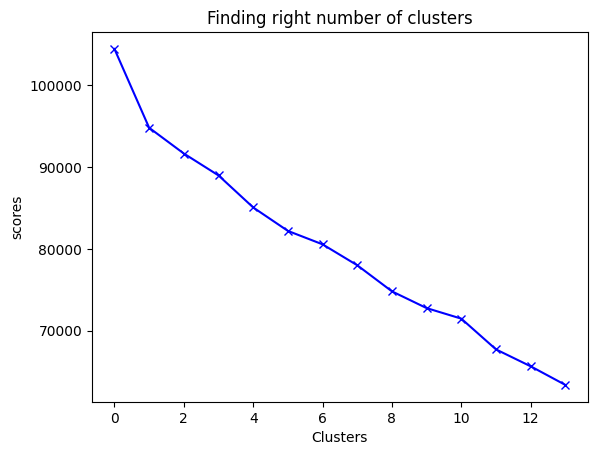

In [30]:
plt.plot(scores, 'bx-')
plt.title('Finding right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('scores')
plt.show();

#### The elbow method

In [31]:
kmeans = KMeans(4)
kmeans.fit(df_scaled)

C:\Users\meenu\anaconda32\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=4)

In [32]:
labels = kmeans.labels_
labels

array([0, 0, 1, ..., 1, 0, 1])

In [33]:
kmeans.cluster_centers_.shape

(4, 37)

In [34]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns= [df.columns])
cluster_centers

QUANTITYORDERED PRICEEACH ORDERLINENUMBER     SALES  MONTH_ID   YEAR_ID  \
0       -0.465084 -0.726204        0.039829 -0.810054  0.005971 -0.001150   
1        0.299596  0.574416       -0.004393  0.457362 -0.004848 -0.015404   
2        1.245428  0.800220       -0.259579  2.573861 -0.088008  0.136857   
3       -0.173920 -0.039573       -0.005290 -0.189818  0.073057 -0.000691   

       MSRP PRODUCTCODE Australia   Austria  ... Classic Cars Motorcycles  \
0 -0.585850    0.306036 -0.264819 -0.007202  ...    -0.160479    0.003843   
1  0.374026   -0.156591 -0.264819  0.020687  ...     0.093150   -0.012433   
2  1.430265   -0.871802 -0.084647  0.043374  ...     0.580097    0.011712   
3 -0.072337   -0.135140  3.776170 -0.140961  ...    -0.118060    0.054645   

     Planes     Ships    Trains Trucks and Buses Vintage Cars     Large  \
0  0.070306  0.083389  0.085339        -0.043245     0.071849 -0.242672   
1 -0.058726 -0.004448 -0.044480         0.063907    -0.080814 -0.242672   
2 -0.164278 -0.300637 -0.128350        -0.201008    -0.151285  4.120788   
3  0.103108 -0.259885 -0.132964         0.000380     0.242402 -0.242672   

     Medium     Small  
0 -0.980703  1.096370  
1  1.019676 -0.912100  
2 -0.980703 -0.912100  
3 -0.014228  0.125986  

[4 rows x 37 columns]

#### Invert the data

In [35]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data=cluster_centers, columns=[df.columns])
cluster_centers

QUANTITYORDERED  PRICEEACH ORDERLINENUMBER        SALES  MONTH_ID  \
0       30.563025  69.010496        6.634454  2062.143941  7.114286   
1       38.010786  95.244923        6.447612  4396.138089  7.074730   
2       47.222930  99.799554        5.369427  8293.753248  6.770701   
3       33.398876  82.860337        6.443820  3204.331798  7.359551   

       YEAR_ID        MSRP PRODUCTCODE     Australia       Austria  ...  \
0  2003.814286   77.175630   63.437815 -8.326673e-17  1.848739e-02  ...   
1  2003.804314  115.744222   48.828197 -5.551115e-17  2.234206e-02  ...   
2  2003.910828  158.184713   26.242038  4.458599e-02  2.547771e-02  ...   
3  2003.814607   97.808989   49.505618  1.000000e+00  6.938894e-18  ...   

  Classic Cars Motorcycles    Planes         Ships    Trains Trucks and Buses  \
0     0.266387    0.118487  0.130252  1.058824e-01  0.041176         0.093277   
1     0.386749    0.113251  0.090139  8.166410e-02  0.020031         0.126348   
2     0.617834    0.121019  0.057325 -5.551115e-17  0.006369         0.044586   
3     0.286517    0.134831  0.140449  1.123596e-02  0.005618         0.106742   

  Vintage Cars         Large        Medium         Small  
0     0.244538  7.632783e-17 -9.992007e-16  1.000000e+00  
1     0.181818  1.387779e-16  1.000000e+00  1.165734e-15  
2     0.152866  1.000000e+00 -3.885781e-16  5.551115e-16  
3     0.314607  6.245005e-17  4.831461e-01  5.168539e-01  

[4 rows x 37 columns]

In [36]:
sales_of_cluster = pd.concat([df, pd.DataFrame({'cluster': labels})], axis=1)
sales_of_cluster.head()

QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  MONTH_ID  YEAR_ID  \
0               30      95.70                2  2871.00         2     2003   
1               34      81.35                5  2765.90         5     2003   
2               41      94.74                2  3884.34         7     2003   
3               45      83.26                6  3746.70         8     2003   
4               49     100.00               14  5205.27        10     2003   

   MSRP  PRODUCTCODE  Australia  Austria  ...  Motorcycles  Planes  Ships  \
0    95            0      False    False  ...         True   False  False   
1    95            0      False    False  ...         True   False  False   
2    95            0      False    False  ...         True   False  False   
3    95            0      False    False  ...         True   False  False   
4    95            0      False    False  ...         True   False  False   

   Trains  Trucks and Buses  Vintage Cars  Large  Medium  Small  cluster  
0   False             False         False  False   False   True        0  
1   False             False         False  False   False   True        0  
2   False             False         False  False    True  False        1  
3   False             False         False  False    True  False        1  
4   False             False         False  False    True  False        1  

[5 rows x 38 columns]